## low-resolution filter

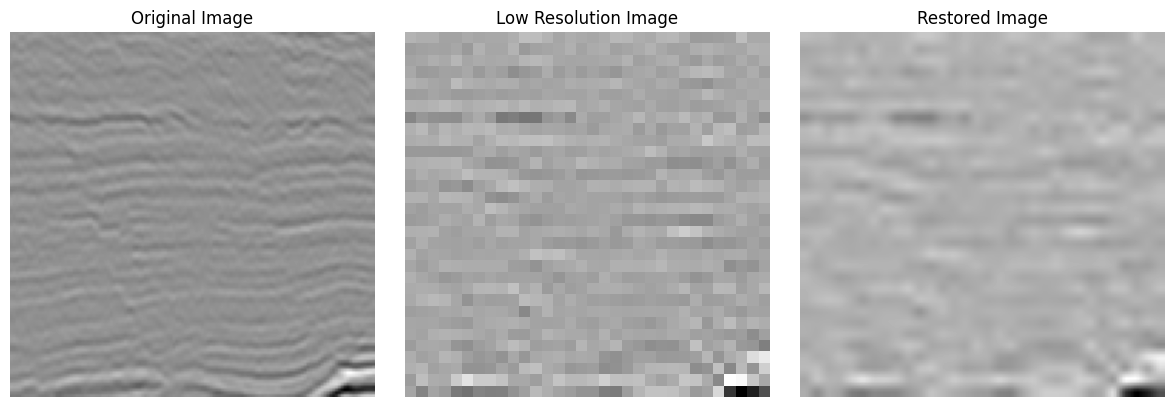

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# .npy 파일에서 이미지를 불러오는 함수
def load_image_from_npy(file_path):
    return np.load(file_path)

# 이미지를 저해상도로 변환하고 원본 크기로 복원하는 함수
def process_image(image, downscale_factor=4):
    # 이미지 텐서로 변환
    img_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # (C, H, W)

    # 저해상도 이미지 생성
    low_res_img = F.interpolate(img_tensor.unsqueeze(0), scale_factor=1/downscale_factor, mode='bilinear', align_corners=False)
    low_res_img = low_res_img.squeeze(0)  # (C, H', W')

    # 원본 크기로 복원
    restored_img = F.interpolate(low_res_img.unsqueeze(0), scale_factor=downscale_factor, mode='bilinear', align_corners=False)
    restored_img = restored_img.squeeze(0)  # (C, H, W)

    return low_res_img.squeeze(0).numpy(), restored_img.squeeze(0).numpy()  # (H', W'), (H, W)

# .npy 파일 경로
npy_file_path = '/data2/seismic_HYUL/dataset/thebe_processed_128_64/train/seismic/00000011.npy'  # 경로를 수정하세요
original_image = load_image_from_npy(npy_file_path)

# 이미지 처리
low_res_image, restored_image = process_image(original_image, downscale_factor=4)

# 결과 시각화
plt.figure(figsize=(12, 4))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

# 저해상도 이미지
plt.subplot(1, 3, 2)
plt.title("Low Resolution Image")
plt.imshow(low_res_image, cmap='gray')
plt.axis('off')

# 복원된 이미지
plt.subplot(1, 3, 3)
plt.title("Restored Image")
plt.imshow(restored_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
